# Проект по дисциплината "Методи и софтуер за машинно обучение"

# **1.  Importing and installing necessary libraries**

In [2]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, roc_auc_score
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
# pip install --upgrade tensorflow

# **2. Loading Data**

In [4]:
df = pd.read_csv('shuffle_email_spam_classification.csv') 

# **3.Summarizing data**

In [5]:
df.head() # prints the first five records

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [6]:
df.tail() # prints the last five records

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
5167,Email 5168,2,2,2,3,0,0,32,0,0,...,0,0,0,0,0,0,0,0,0,0
5168,Email 5169,35,27,11,2,6,5,151,4,3,...,0,0,0,0,0,0,0,1,0,0
5169,Email 5170,0,0,1,1,0,0,11,0,0,...,0,0,0,0,0,0,0,0,0,1
5170,Email 5171,2,7,1,0,2,1,28,2,0,...,0,0,0,0,0,0,0,1,0,1
5171,Email 5172,22,24,5,1,6,5,148,8,2,...,0,0,0,0,0,0,0,0,0,0


# **3.1. Shape of the dataset**

In [7]:
df.shape # 5172 records and 3002 attributes (features)

(5172, 3002)

# **3.3. Summary Statistics**

In [8]:
df.describe() # to understand the statistics of the features like count, mean, median (50%), standard deviation, min and max, and 25th and 75th quantiles

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
count,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,...,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000
mean,6.640565,6.188128,5.143852,3.075599,3.124710,2.627030,55.517401,2.466551,2.024362,10.600155,...,0.005027,0.012568,0.010634,0.098028,0.004254,0.006574,0.004060,0.914733,0.006961,0.290023
std,11.745009,9.534576,14.101142,6.045970,4.680522,6.229845,87.574172,4.314444,6.967878,19.281892,...,0.105788,0.199682,0.116693,0.569532,0.096252,0.138908,0.072145,2.780203,0.098086,0.453817
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,12.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,3.000000,1.000000,1.000000,2.000000,1.000000,28.000000,1.000000,0.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.000000,7.000000,4.000000,3.000000,4.000000,2.000000,62.250000,3.000000,1.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,210.000000,132.000000,344.000000,89.000000,47.000000,77.000000,1898.000000,70.000000,167.000000,223.000000,...,4.000000,7.000000,2.000000,12.000000,3.000000,4.000000,3.000000,114.000000,4.000000,1.000000


# **4. Data Preprocessing**

# **4.1. Data Cleaning**

# **4.1.1. Identifying missing data**

In [9]:
df.isna().sum() # to identify if the dataset is missing values through the method isna().sum()

Email No.     0
the           0
to            0
ect           0
and           0
             ..
military      0
allowing      0
ff            0
dry           0
Prediction    0
Length: 3002, dtype: int64

**Duplicated rows**

In [10]:
df[df.duplicated()] # to identify if there are duplicate rows in the dataset

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction


In [11]:
df.drop(columns=['Email No.'],inplace=True) # delete this column because is unused in the model

# **4.2. Outliers**

**Boxplots to identify outliers**

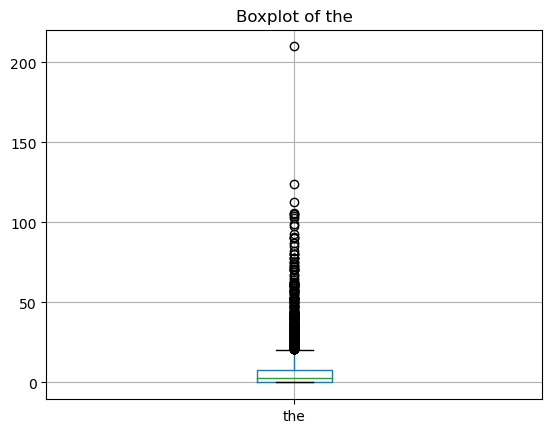

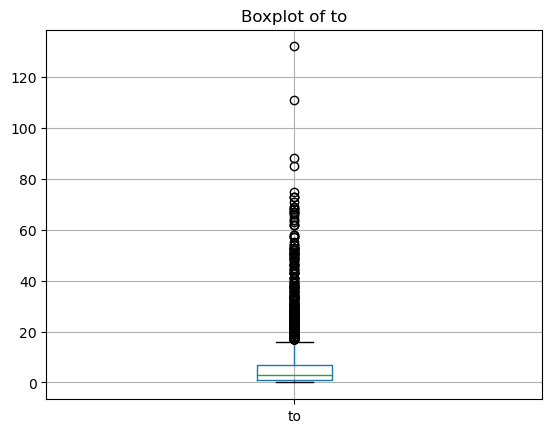

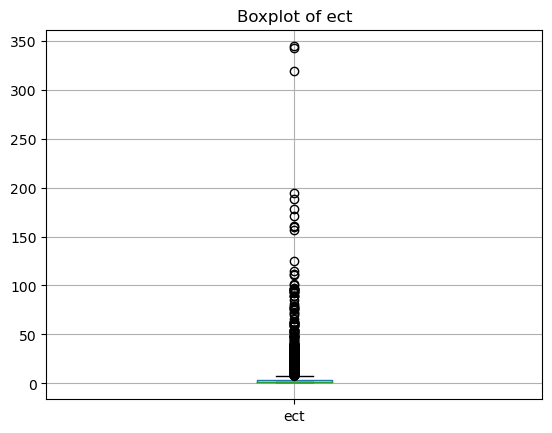

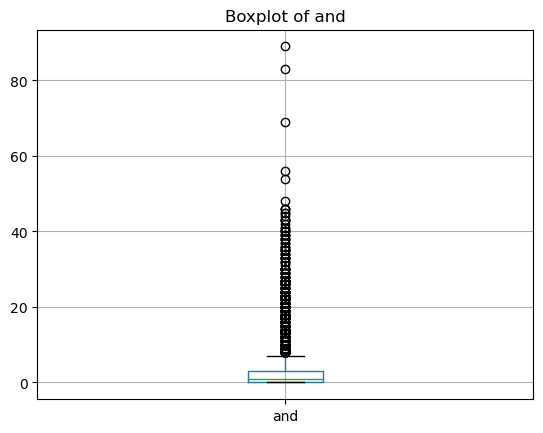

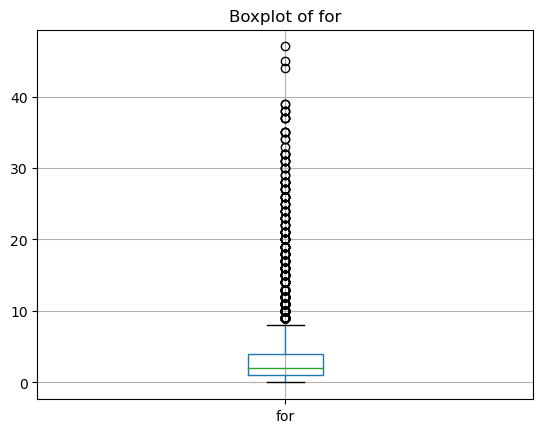

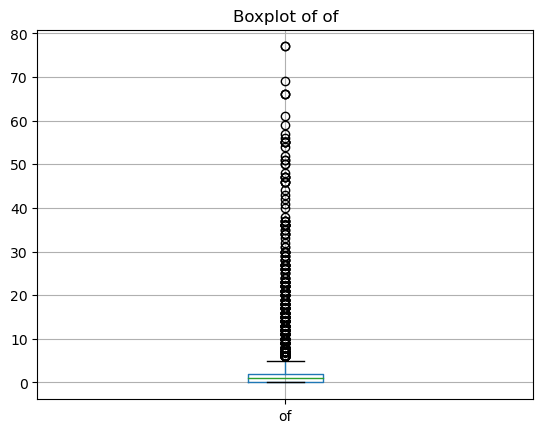

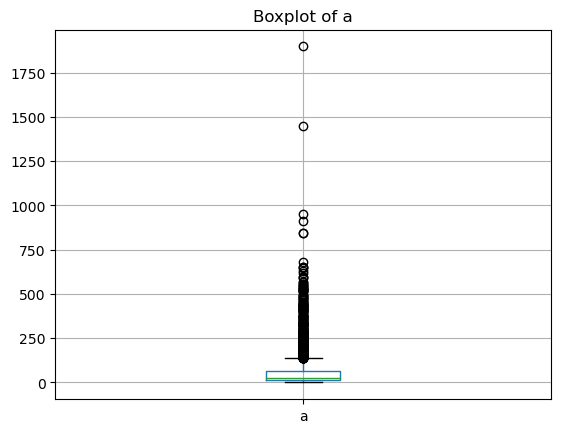

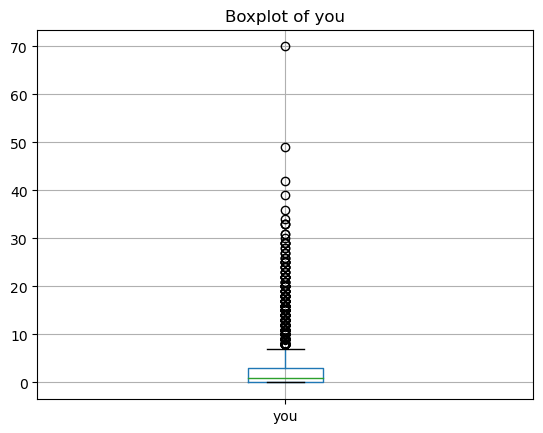

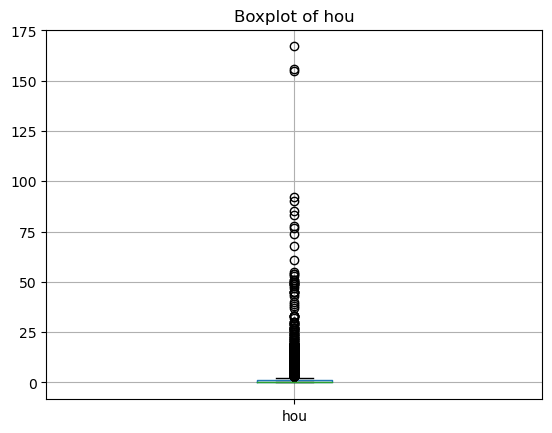

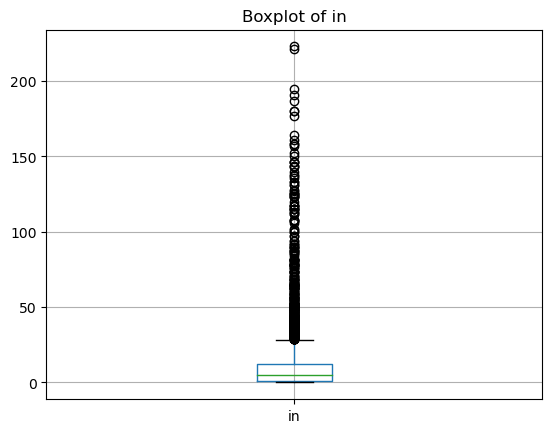

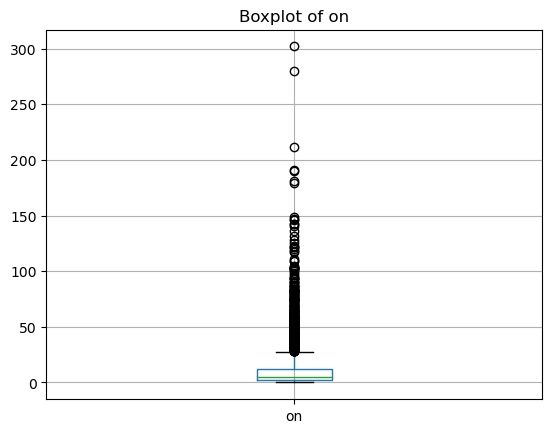

In [15]:
for column in df.columns[:11]:
        plt.figure()
        df.boxplot(column=column)
        plt.title(f"Boxplot of {column}")
        plt.show() # through for loop - iterate by first 11 columns in the dataset which are categorical and all features content outliers which can be object of the analysis

# **5.EDA (Exploratory Data Analysis)**

# **5.1.Distribution of data**

<Figure size 640x480 with 0 Axes>

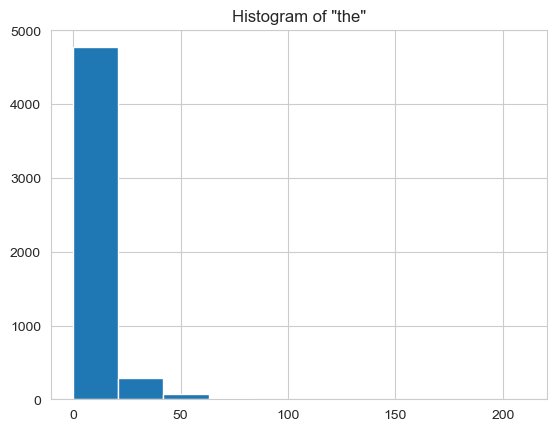

<Figure size 640x480 with 0 Axes>

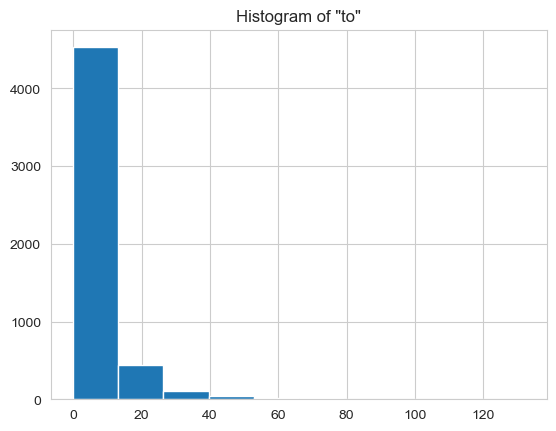

<Figure size 640x480 with 0 Axes>

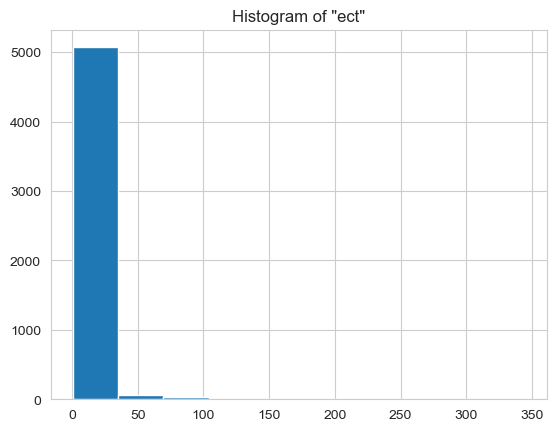

<Figure size 640x480 with 0 Axes>

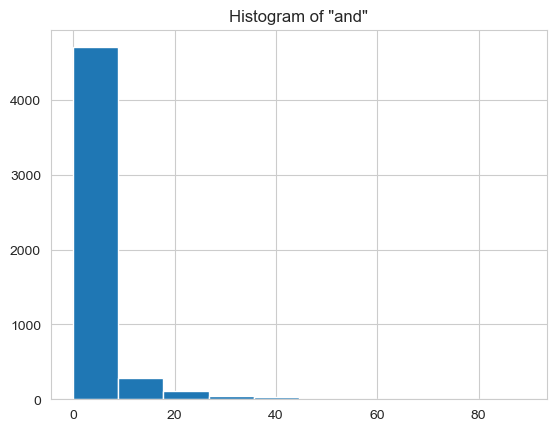

<Figure size 640x480 with 0 Axes>

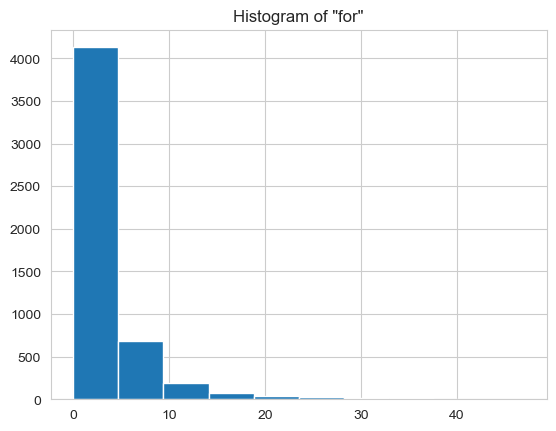

<Figure size 640x480 with 0 Axes>

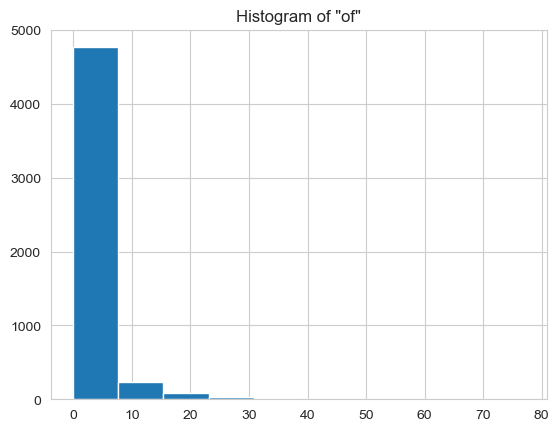

<Figure size 640x480 with 0 Axes>

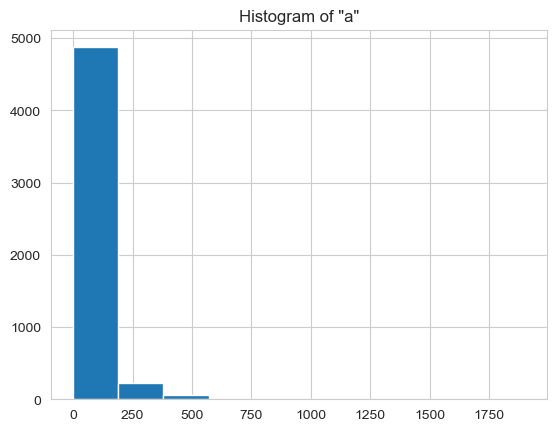

<Figure size 640x480 with 0 Axes>

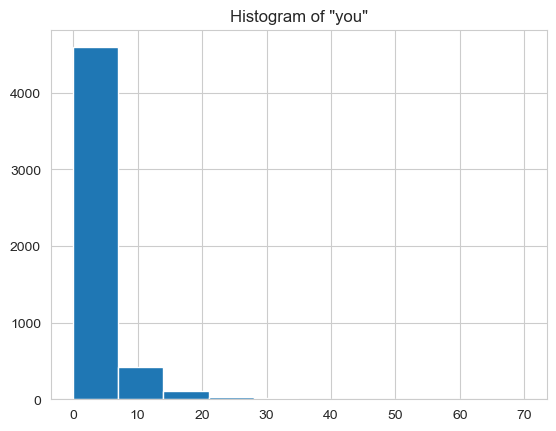

<Figure size 640x480 with 0 Axes>

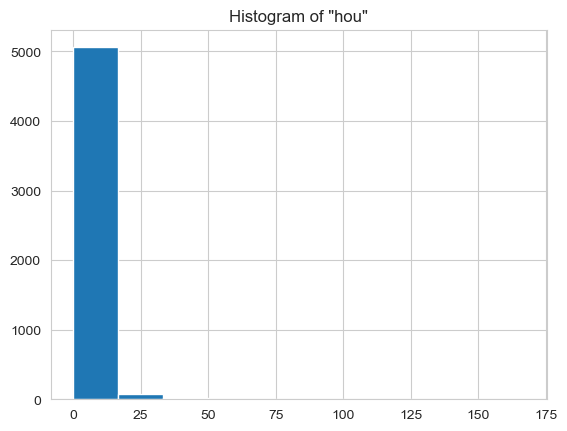

<Figure size 640x480 with 0 Axes>

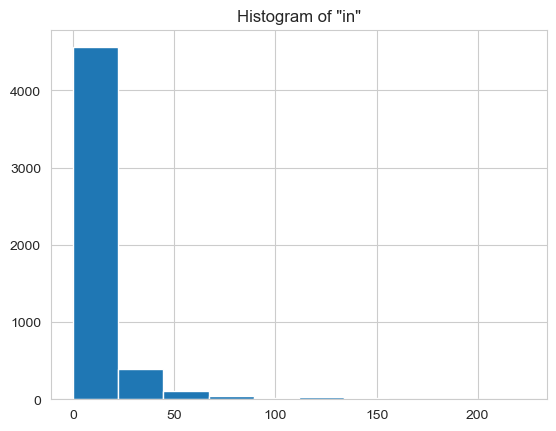

<Figure size 640x480 with 0 Axes>

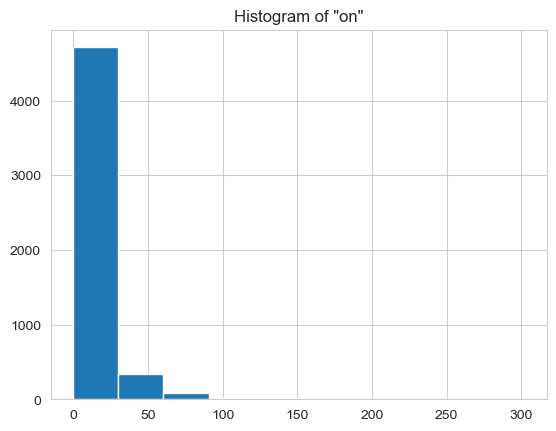

In [16]:
for column in df.columns[:11]:
        plt.figure()
        sns.set_style('whitegrid')
        df.hist(column=column)
        plt.title(f'Histogram of "{column}"')
        plt.show() # Plotting Histogram(Frequency in the email for each word) for first 11 columns to see the distribution of data

In [12]:
for column in df.columns:
    value_counts_series = df[column].value_counts() # display value counts for each column - for each column, this line calculates the frequency of each unique value using the value_counts() method. It returns a pandas Series where the index represents unique values, and the values represent their frequencies.
    print(f"Value counts for {column}:\n{value_counts_series}\n") # prints the column name and its corresponding value counts

Value counts for the:
0      1323
1       628
2       545
3       412
4       329
       ... 
54        1
99        1
124       1
64        1
82        1
Name: the, Length: 90, dtype: int64

Value counts for to:
0      1051
1       704
2       544
3       503
4       375
       ... 
111       1
63        1
65        1
85        1
88        1
Name: to, Length: 72, dtype: int64

Value counts for ect:
1      2587
2       875
3       351
4       229
5       161
       ... 
344       1
81        1
101       1
194       1
85        1
Name: ect, Length: 90, dtype: int64

Value counts for and:
0     2091
1      928
2      538
3      362
4      248
5      195
6      159
7       96
8       86
9       64
11      40
10      39
12      34
13      26
16      25
14      24
15      21
18      17
20      17
19      17
21      14
17      11
24      10
23      10
22       9
27       8
26       7
25       7
30       7
28       5
33       5
29       5
35       5
43       4
40       4
38       4
32       3


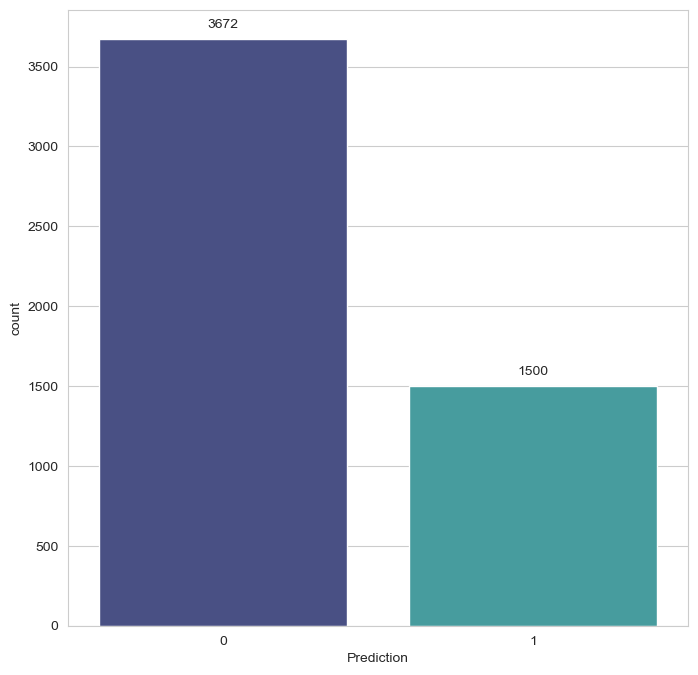

In [18]:
fig = plt.figure(figsize=(8,8)) # create a figure with a specified size

ax = sns.countplot(x="Prediction", data=df, palette='mako') # using countplot to visualize the predictions which are not spam (0) and spam (1)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points') # annotate each bar in the countplot with its height

plt.xlabel = "Prediction"
plt.title='Count of Predictions'
plt.show()

# 5.2. Correlation Analysis

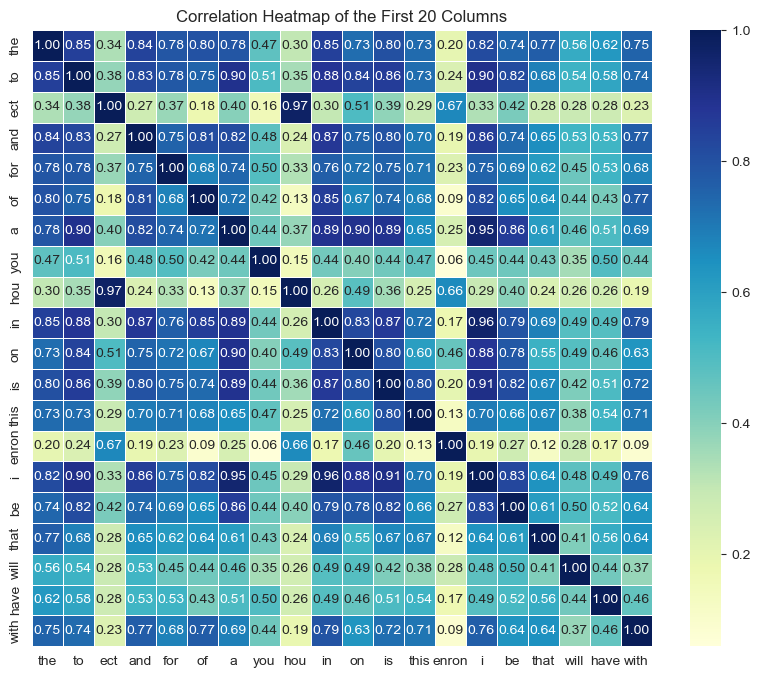

In [14]:
selected_columns = df.iloc[:, :20]

# Calculate the correlation matrix
correlation_matrix = selected_columns.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='YlGnBu', annot=True, fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of the First 20 Columns')
plt.show()

# 6. Feature Selection

In [19]:
X = df.drop(columns='Prediction',axis=1) # Explanatory variables
y = df['Prediction'] # target (dependent) variable

In [16]:
X

,the,to,ect,and,for,of,a,you,hou,in,...,enhancements,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry
0,0,0,1,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8,13,24,6,6,2,102,1,27,18,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,0,0,0,8,0,0,4,...,0,0,0,0,0,0,0,0,0,0
3,0,5,22,0,5,1,51,2,10,1,...,0,0,0,0,0,0,0,0,0,0
4,7,6,17,1,5,2,57,0,9,3,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,2,2,2,3,0,0,32,0,0,5,...,0,0,0,0,0,0,0,0,0,0
5168,35,27,11,2,6,5,151,4,3,23,...,0,0,0,0,0,0,0,0,1,0
5169,0,0,1,1,0,0,11,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5170,2,7,1,0,2,1,28,2,0,8,...,0,0,0,0,0,0,0,0,1,0


In [17]:
y

0       0
1       0
2       0
3       0
4       0
       ..
5167    0
5168    0
5169    1
5170    1
5171    0
Name: Prediction, Length: 5172, dtype: int64

                  Score  P-values
Attribute                        
i          20933.845216       0.0
s           9905.907062       0.0
r           9581.168541       0.0
a           8297.355495       0.0
o           7767.524289       0.0
n           6818.365184       0.0
e           6309.085868       0.0
p           6102.448757       0.0
t           5700.608037       0.0
d           4752.245232       0.0
l           4625.130071       0.0
g           4456.134421       0.0
in          4304.410057       0.0
f           3982.632753       0.0
b           3676.791749       0.0
u           3616.623602       0.0
v           3225.945897       0.0
of          2971.842630       0.0
ect         2916.057301       0.0
enron       2821.078431       0.0


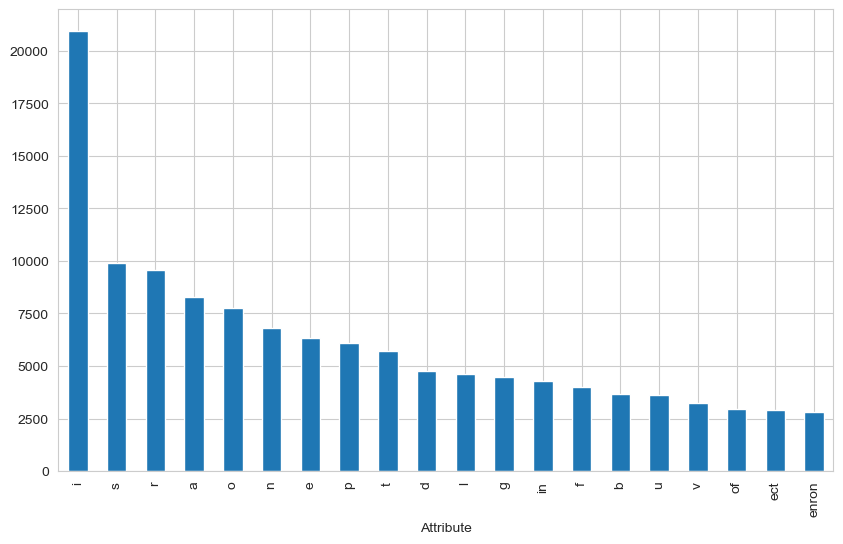

In [23]:
best_fe = SelectKBest(score_func=chi2, k=20)

fit_obj = best_fe.fit(X, y) # fit (invokes the chi2 function)

# The instance fit_obj has attributes scores_ and pvalues_
scores = pd.DataFrame(fit_obj.scores_) 
pvals = pd.DataFrame(fit_obj.pvalues_)

columns = pd.DataFrame(X.columns) # Get the column names

feature_scores = pd.concat([columns, scores, pvals], axis=1)  # concatenate and obtain a DataFrame
feature_scores.columns = ['Attribute', 'Score', 'P-values']   # set the DataFrame column names

# Select the n best (largest) scores
n_top_features = 20  # Adjust this value as needed
best_df_chi2 = feature_scores.nlargest(n_top_features, 'Score')
best_df_chi2.set_index('Attribute', inplace=True)

print(best_df_chi2) # prints the best 20 coefficients from the dataset

# Plot the bar chart
plt.figure(figsize=(10, 6)) # create a figure with a specified size
best_df_chi2['Score'].plot(kind='bar') 
plt.ylabel='Score'
plt.xlabel='Attribute'
plt.title=f'Top {n_top_features} features based on chi-squared test'
plt.show()

# 7. Dimensionality Reduction

In [19]:
scaler = StandardScaler()

X = scaler.fit_transform(X)
n_pcs = 5
pca_obj = PCA(n_components=n_pcs)  
principal_components = pca_obj.fit_transform(X)  # compute PCs

princomps_df = pd.DataFrame(data = principal_components, columns = ['PC 1', 'PC 2', 'PC 3', 'PC 4', 'PC 5'])

princomps_df.head(10)

,PC 1,PC 2,PC 3,PC 4,PC 5
0,-8.069820,-2.853976,0.793311,0.704215,0.626821
1,7.878270,4.976512,-5.977322,1.965240,-3.628040
2,-7.866094,-2.731072,0.415226,0.727375,0.568572
3,-1.798441,2.859783,-5.404428,0.589925,-0.937389
4,-2.058668,2.258604,-4.651907,0.660938,-0.477613
5,2.100273,-0.372642,2.882438,-0.166321,1.322268
6,-4.227434,-0.420350,-0.931302,0.324194,0.469057
7,-4.687679,-2.139208,2.411610,0.322260,1.317768
8,-5.444063,-0.701601,-0.128357,-0.221694,0.219720
9,-0.930155,2.763158,-3.146806,0.251644,0.975099


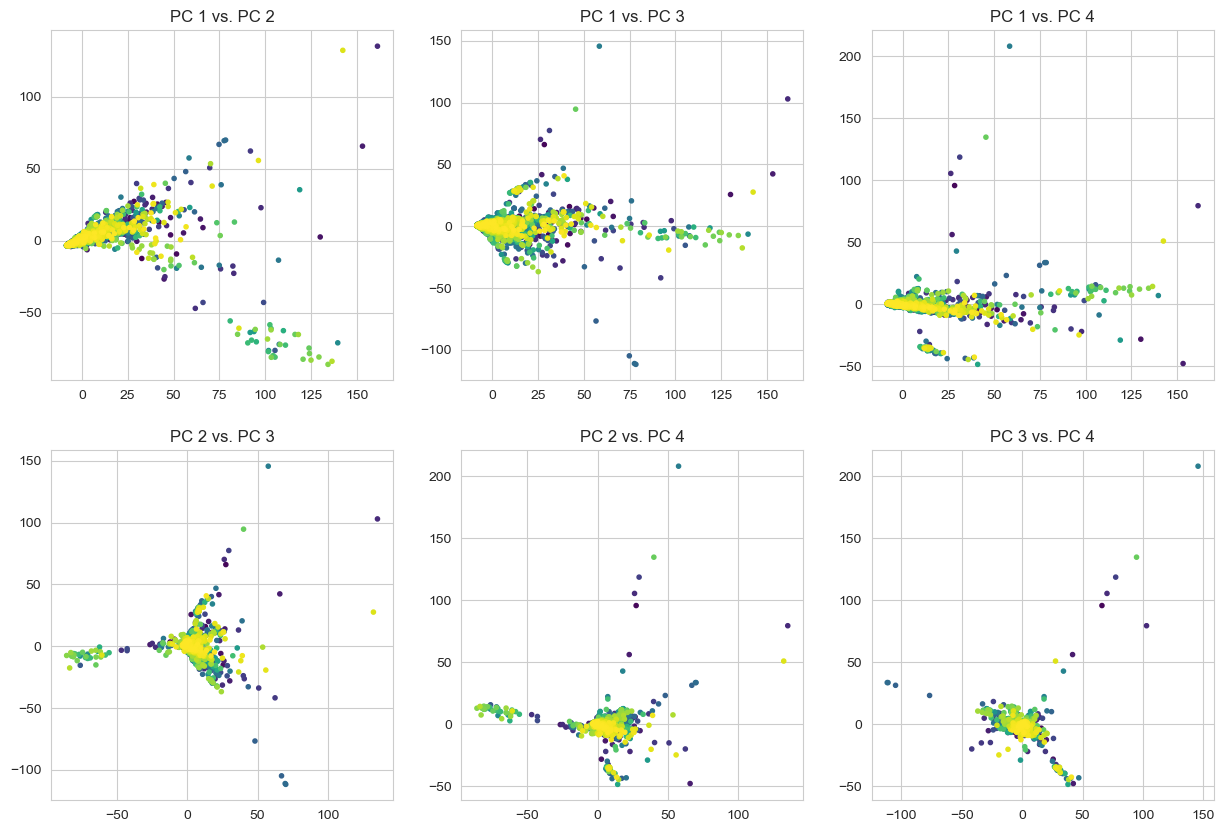

In [20]:
fig, ax = plt.subplots(2, 3, figsize=(15, 10))

# Define the principal components to be plotted
pcs_to_plot = [('PC 1', 'PC 2'), ('PC 1', 'PC 3'), ('PC 1', 'PC 4'),
               ('PC 2', 'PC 3'), ('PC 2', 'PC 4'), ('PC 3', 'PC 4')]

for i, (pc_x, pc_y) in enumerate(pcs_to_plot):
    row = i // 3
    col = i % 3

    ax[row, col].set_title(f'{pc_x} vs. {pc_y}')
    ax[row, col].scatter(princomps_df[pc_x], princomps_df[pc_y], c=princomps_df.index, cmap='viridis', marker=".")

plt.show()

# 8. Data Modeling

In [21]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: PCA
n_components = 5  # Choose the number of principal components
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=1111)

In [23]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(5172, 3000)
(4137, 5)
(1035, 5)


In [24]:
def perform_metrics(y_test,y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(cm)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="GnBu", cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])

    plt.title = 'Confusion Matrix'
    plt.xlabel = 'Predicted'
    plt.ylabel = 'Actual'
    plt.show()

# 8.1. Logistic Regression

In [25]:
logr_model = LogisticRegression()

In [26]:
logr_model.fit(X_train,y_train)

LogisticRegression()

In [27]:
y_pred_logr = logr_model.predict(X_test)

In [28]:
y_pred_logr

array([0, 1, 0, ..., 0, 1, 1], dtype=int64)

# 8.1.1. Evalueate model

Accuracy: 0.93
Precision: 0.90
Recall: 0.82
F1 Score: 0.86
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       753
           1       0.90      0.82      0.86       282

    accuracy                           0.93      1035
   macro avg       0.92      0.89      0.90      1035
weighted avg       0.92      0.93      0.92      1035

Confusion Matrix:
[[726  27]
 [ 50 232]]


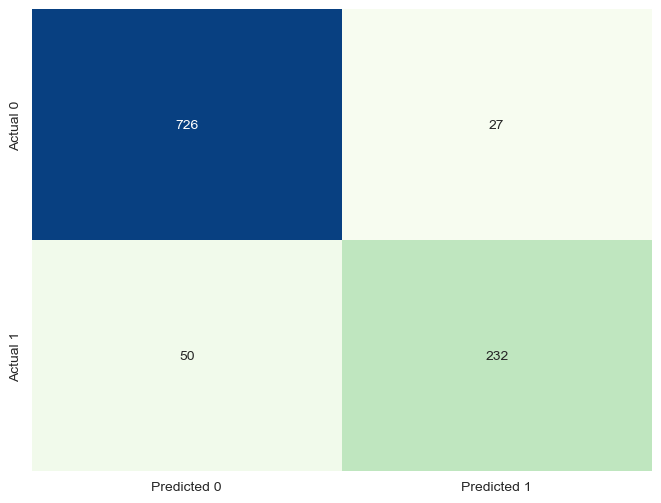

In [29]:
perform_metrics(y_test, y_pred_logr)

# 8.1.2. ROC Analysis and check for overfitting

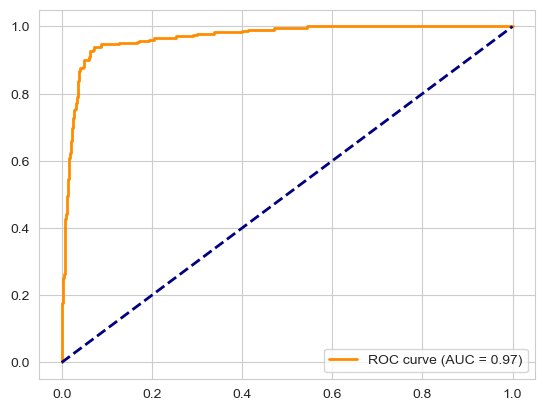

In [30]:
fpr, tpr, thresholds = roc_curve(y_test, logr_model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel = 'False Positive Rate'
plt.ylabel = 'True Positive Rate'
plt.title = 'Receiver Operating Characteristic Curve'
plt.legend(loc="lower right")
plt.show()

In [31]:
y_train_pred_logr = logr_model.predict(X_train)

print("Training Set:")
print(f"Accuracy: {accuracy_score(y_train, y_train_pred_logr):.2f}")
print("Classification Report:\n", classification_report(y_train, y_train_pred_logr))

Training Set:
Accuracy: 0.90
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.96      0.93      2919
           1       0.89      0.77      0.83      1218

    accuracy                           0.90      4137
   macro avg       0.90      0.87      0.88      4137
weighted avg       0.90      0.90      0.90      4137



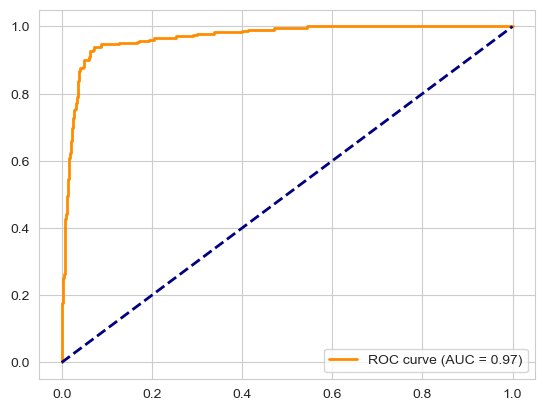

In [32]:
fpr, tpr, thresholds = roc_curve(y_test, logr_model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel = 'False Positive Rate'
plt.ylabel = 'True Positive Rate'
plt.title = 'Receiver Operating Characteristic Curve'
plt.legend(loc="lower right")
plt.show()

# 8.1.3. Cross - validation with k-Fold = 6

In [33]:
cross_val_scores = cross_val_score(logr_model, X_train, y_train, cv=6, scoring='accuracy')
print("Cross-Validation Scores:", cross_val_scores)
print("Mean Accuracy:", np.mean(cross_val_scores))

Cross-Validation Scores: [0.89275362 0.88985507 0.90144928 0.92307692 0.91436865 0.89114659]
Mean Accuracy: 0.9021083555948199


# 8.2. Random Forest Classifier

Accuracy: 0.94
Precision: 0.87
Recall: 0.91
F1 Score: 0.89
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       753
           1       0.87      0.91      0.89       282

    accuracy                           0.94      1035
   macro avg       0.92      0.93      0.93      1035
weighted avg       0.94      0.94      0.94      1035

Confusion Matrix:
[[715  38]
 [ 24 258]]


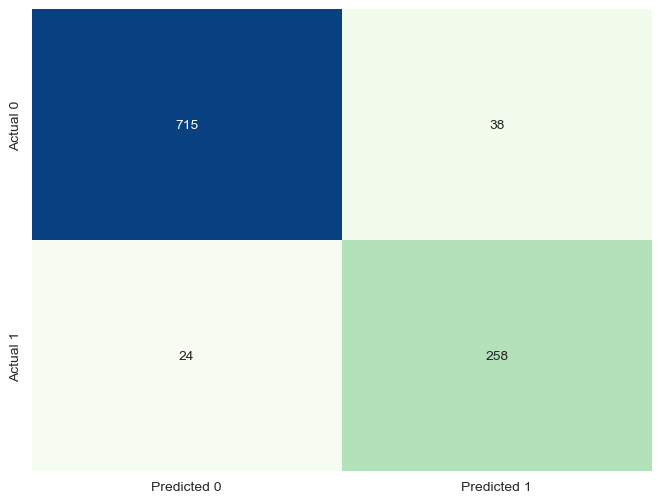

In [34]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Predictions on the test set
y_pred_rf = rf_classifier.predict(X_test)

perform_metrics(y_test, y_pred_rf)


# 8.2.1. Cross - Validation with K-Fold = 6

In [35]:
cross_val_scores = cross_val_score(rf_classifier, X_train, y_train, cv=6, scoring='accuracy')
print("Cross-Validation Scores:", cross_val_scores)
print("Mean Accuracy:", np.mean(cross_val_scores))

Cross-Validation Scores: [0.94927536 0.95217391 0.93623188 0.94775036 0.94775036 0.92017417]
Mean Accuracy: 0.9422260084278132


# 8.3. Support Vector Machine

Accuracy: 0.92
Precision: 0.89
Recall: 0.79
F1 Score: 0.84
              precision    recall  f1-score   support

           0       0.93      0.96      0.94       753
           1       0.89      0.79      0.84       282

    accuracy                           0.92      1035
   macro avg       0.91      0.88      0.89      1035
weighted avg       0.91      0.92      0.91      1035

Confusion Matrix:
[[724  29]
 [ 58 224]]


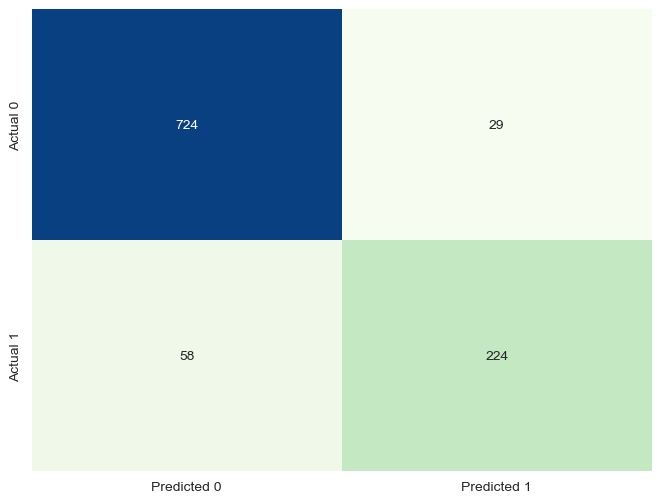

In [36]:
svm_classifier = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)

# Train the model
svm_classifier.fit(X_train, y_train)

# Predictions on the test set
y_pred_svc = svm_classifier.predict(X_test)

perform_metrics(y_test, y_pred_svc)


# 8.3.1. Cross - Validation with K-Fold = 6¶

In [37]:
cross_val_scores = cross_val_score(svm_classifier, X_train, y_train, cv=6, scoring='accuracy')
print("Cross-Validation Scores:", cross_val_scores)
print("Mean Accuracy:", np.mean(cross_val_scores))

Cross-Validation Scores: [0.8826087  0.90434783 0.8942029  0.89114659 0.91001451 0.87518142]
Mean Accuracy: 0.8929169909481641


# 9. **Models Comparision**

In [38]:
print("Algorithms analised: ")
logr_accuracy = accuracy_score(y_test, y_pred_logr)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
svm_accuracy = accuracy_score(y_test, y_pred_svc)

# Print the results
print(f"Logistic Regression: "+str(round(logr_accuracy*100,2))+" % of accuracy")
print("Random Forest: "+str(round(rf_accuracy*100,2))+" % of accuracy")
print(f"SVM: "+str(round(svm_accuracy*100,2))+" % of accuracy")

Algorithms analised: 
Logistic Regression: 92.56 % of accuracy
Random Forest: 94.01 % of accuracy
SVM: 91.59 % of accuracy


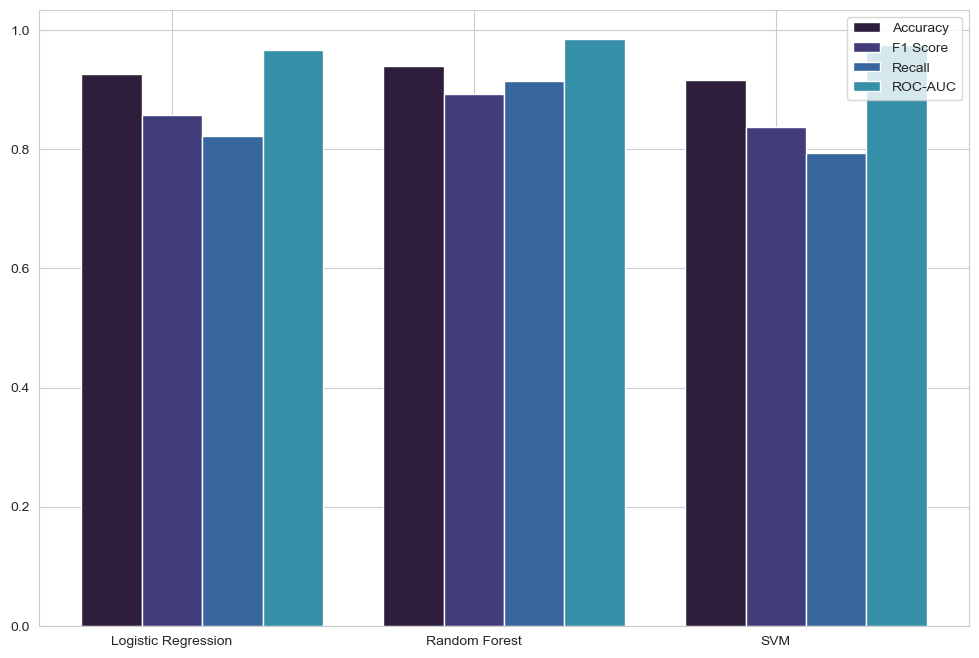

In [39]:
sns.set_palette('mako')
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(kernel='rbf', C=1.0, probability=True, random_state=42)
}

# Lists to store metrics for each model
accuracy_list = []
f1_list = []
recall_list = []
roc_auc_list = []
model_names = []

# Train models and calculate metrics
for model_name, model in models.items():
    model_names.append(model_name)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    
    # Check if the model supports probability estimates
    if hasattr(model, 'predict_proba'):
        roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
        roc_auc_list.append(roc_auc)
    else:
        roc_auc = None
        roc_auc_list.append(None)
    
    accuracy_list.append(accuracy)
    f1_list.append(f1)
    recall_list.append(recall)

# Create grouped bar plot
bar_width = 0.2
index = np.arange(len(model_names))

plt.figure(figsize=(12, 8))

plt.bar(index - bar_width, accuracy_list, width=bar_width, label='Accuracy', align='center')
plt.bar(index, f1_list, width=bar_width, label='F1 Score', align='center')
plt.bar(index + bar_width, recall_list, width=bar_width, label='Recall', align='center')
plt.bar(index + 2 * bar_width, roc_auc_list, width=bar_width, label='ROC-AUC', align='center')

plt.xlabel='Model'
plt.ylabel='Metrics'
plt.title='Comparison of Metrics for Different Models'
plt.xticks(index, model_names)  # Set x-axis ticks and labels
plt.legend()

plt.show()

# 10. Neural Networks

In [48]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

# Evaluate the model on the test set
y_pred_proba = model.predict(X_test)
y_pred = (y_pred_proba > 0.5).astype(int)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'Recall: {recall:.4f}')
print(f'ROC-AUC: {roc_auc:.4f}')

Epoch 1/100
117/117 [==============================] - 3s 5ms/step - loss: 0.3662 - accuracy: 0.8421 - val_loss: 0.2581 - val_accuracy: 0.8841
Epoch 2/100
117/117 [==============================] - 0s 3ms/step - loss: 0.2277 - accuracy: 0.9046 - val_loss: 0.2134 - val_accuracy: 0.9010
Epoch 3/100
117/117 [==============================] - 0s 3ms/step - loss: 0.1953 - accuracy: 0.9170 - val_loss: 0.2035 - val_accuracy: 0.9034
Epoch 4/100
117/117 [==============================] - 0s 3ms/step - loss: 0.1810 - accuracy: 0.9200 - val_loss: 0.1838 - val_accuracy: 0.9106
Epoch 5/100
117/117 [==============================] - 0s 3ms/step - loss: 0.1769 - accuracy: 0.9229 - val_loss: 0.1884 - val_accuracy: 0.9058
Epoch 6/100
117/117 [==============================] - 0s 3ms/step - loss: 0.1693 - accuracy: 0.9243 - val_loss: 0.1778 - val_accuracy: 0.9082
Epoch 7/100
117/117 [==============================] - 0s 3ms/step - loss: 0.1664 - accuracy: 0.9294 - val_loss: 0.1734 - val_accuracy: 0.9179

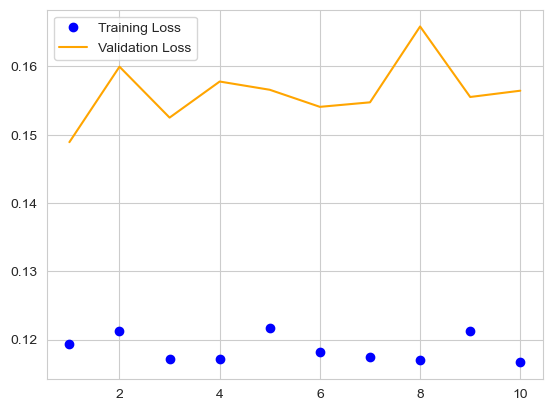

In [62]:
# Retrieve the loss in function of the epoch for the training set
loss_hist = history.history['loss']

# Retrieve the loss in function of the epoch for the validation set
loss_hist_validation = history.history['val_loss']

# Plotting the training and validation loss using Matplotlib
plt.plot(range(1, len(loss_hist) + 1), loss_hist, 'bo', label='Training Loss')
plt.plot(range(1, len(loss_hist_validation) + 1), loss_hist_validation, 'orange', label='Validation Loss')

plt.title='Model Loss Over Epochs'
plt.xlabel='Epoch'
plt.ylabel='Loss'
plt.legend()

plt.show()


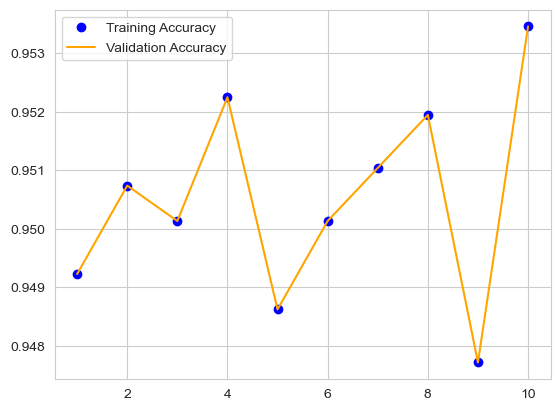

In [63]:
# Retrieve the loss in function of the epoch for the training set
loss_hist = history.history['accuracy']

# Retrieve the loss in function of the epoch for the validation set
loss_hist_validation = history.history['accuracy']

# Plotting the training and validation loss using Matplotlib
plt.plot(range(1, len(loss_hist) + 1), loss_hist, 'bo', label='Training Accuracy')
plt.plot(range(1, len(loss_hist_validation) + 1), loss_hist_validation, 'orange', label='Validation Accuracy')

plt.title='Model Loss Over Epochs'
plt.xlabel='Epoch'
plt.ylabel='Accuracy'
plt.legend()

plt.show()
